# Unstructured Data (Part I)

## Image Processing

By the end of this lecture, you should have an understanding of key libraries and methods used in image and text processing, as well as hands-on experience implementing these techniques using Python.


In [2]:
import numpy as np
import cv2 as cv
import gzip
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as plti

from urllib.request import urlopen
from io import BytesIO

from PIL import Image

from scipy import ndimage
from scipy.io import loadmat

from skimage import measure, data, color, morphology, io, feature

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Image Data

Images are a common type of unstructured data, which often contain valuable information for diverse applications such as computer vision, machine learning, and digital image processing. An image can be thought of as a two-dimensional grid of pixels, with each pixel representing an individual point of color or intensity.

For example, a black-white image is an integer matrix whose individual cells are called *pixels* whose values range from 0 (black) to 255 (white)

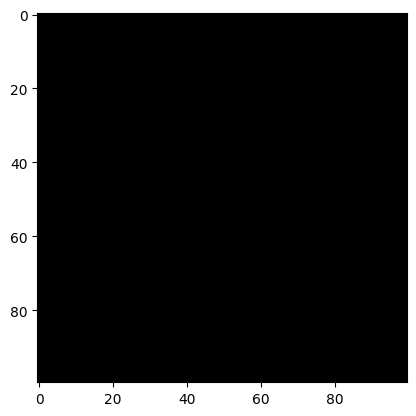

In [3]:
black = np.zeros((100,100))
plt.imshow(black, cmap='gray')

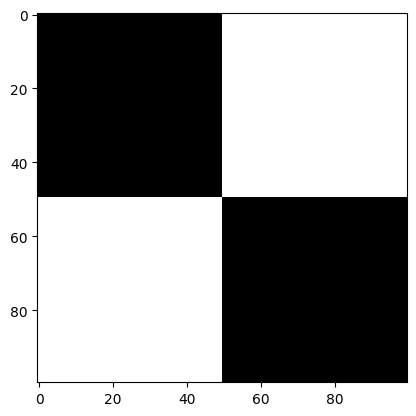

In [4]:
white = np.zeros((100,100))
white[:50,:50] = 255
white[50:,50:] = 255
plt.imshow(white, cmap='Grays')

A color image, on the other hand, consists of three layers: [Source:](https://www.geeksforgeeks.org/matlab-rgb-image-representation/)

![RGB Layers](https://media.geeksforgeeks.org/wp-content/uploads/Pixel.jpg)

## Color Channels:

In digital image processing, color channels refer to the individual components that make up the representation of a color. Most commonly, images are represented using the RGB (Red, Green, Blue) color space, which combines these three primary colors to create the wide range of colors we see in digital images. 

Each color channel can be thought of as a separate grid of pixel intensities ranging from 0 (none of that color) to 255 (maximum intensity for that color). In the RGB model, an 8-bit representation is used for each color channel, leading to a 24-bit image with 2^24 possible colors. 

There are other color spaces used in image processing, such as HSV (Hue, Saturation, Value), YCbCr (Luma, Blue Chrominance, Red Chrominance), and CMYK (Cyan, Magenta, Yellow, Black), each with their own benefits and applications.

The following example image is taken from [here](https://justbirding.com/most-colorful-birds/)

(548, 768, 3)


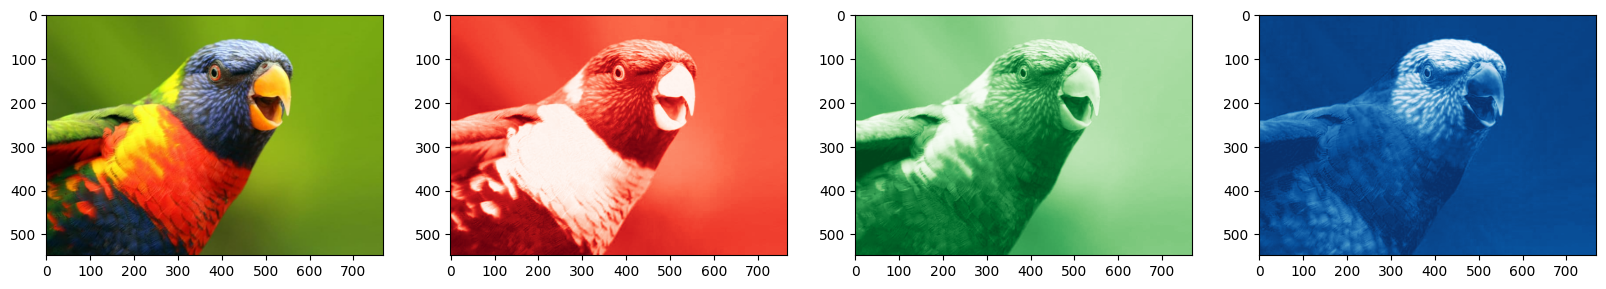

In [6]:
bird = plti.imread('../images/bird.jpg')
print(bird.shape)
fig, ax = plt.subplots(ncols=4, figsize=(20,8))
ax[0].imshow(bird, cmap='gray')
ax[1].imshow(bird[:,:,0], cmap='Reds_r')
ax[2].imshow(bird[:,:,1], cmap='Greens_r')
ax[3].imshow(bird[:,:,2], cmap='Blues_r')

For a black and white images, theoretically you don't have to worry about the RGB layers since they contain only one layer. But most b/w images these days also come with RGB layers. [The image below is taken from [here](https://www.theguardian.com/world/2020/mar/03/turkish-president-ataturk-demands-purge-of-religion-from-politics-archive-1924).]

(372, 620, 3)


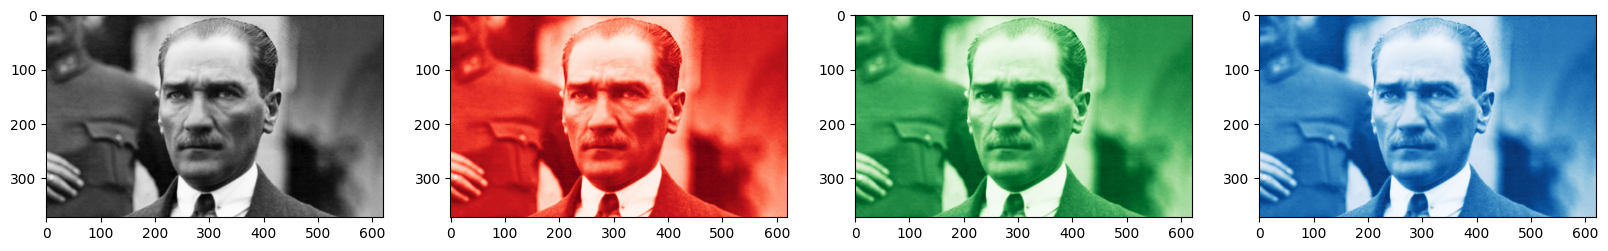

In [7]:
ataturk = plti.imread('../images/ataturk.jpg')
print(ataturk.shape)
fig, ax = plt.subplots(ncols=4, figsize=(20,8))
ax[0].imshow(ataturk, cmap='gray')
ax[1].imshow(ataturk[:,:,0], cmap='Reds_r')
ax[2].imshow(ataturk[:,:,1], cmap='Greens_r')
ax[3].imshow(ataturk[:,:,2], cmap='Blues_r')

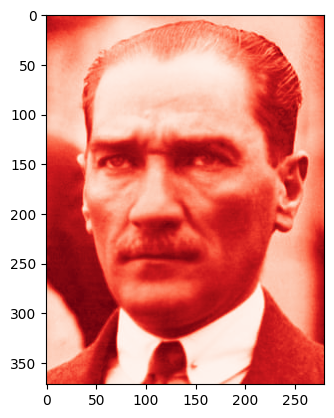

In [9]:
plt.imshow(ataturk[:,170:450,0],cmap='Reds_r')

## Main Image Formats

However, images are not stored as binary matrix data. There are some file types and formats that deal with efficient storing, true color support, and even some simple animations. So, when we load an image as a matrix data, first a reader is invoked to encode the picture as an array data. Each format has its specific use cases and trade-offs, such as file size, image quality, and compatibility with various applications. In image processing, it's important to choose the appropriate format based on the requirements and constraints of a given project.


### Raster Formats

1. JPEG (Joint Photographic Experts Group): JPEG is a widely used lossy compression format for images. It is suitable for photographs and complex images with a large number of colors. Due to its lossy compression, the image quality may degrade when repeatedly edited and saved in the JPEG format.

2. PNG (Portable Network Graphics): PNG is a lossless compression format that supports both indexed color and true color images. It's widely used for images on the web, as it allows for transparency and provides better quality and compression than GIF.

3. GIF (Graphics Interchange Format): GIF is a lossy compression format that supports up to 256 colors, which makes it suitable for simple images like logos, icons, and graphics with a limited color palette. GIF images can also contain animation, which has contributed to its popularity on the web.

4. BMP (Bitmap): BMP is an uncompressed image format that stores pixel data in a grid format. The lack of compression results in large file sizes, making it less suitable for web use but ideal for certain applications that require raw, uncompressed pixel data.

5. TIFF (Tagged Image File Format): TIFF is a versatile and flexible format that supports both lossless and lossy compression algorithms, including JPEG and LZW. It is suitable for high-quality images, especially in professional photography and print environments.

### Vector Formats

Vector formats are crucial for certain image processing tasks, especially when scalability without resolution loss is needed. While formats like JPEG, PNG, and GIF are raster (or bitmap) formats that represent images as fixed grids of pixels, vector formats represent images as geometric shapes, defined by mathematical formulas. As a result, vector images can be scaled or edited without any degradation in quality, making them ideal for computer graphics, logos, icons, and other applications where resolution independence is important.

Here are a few notable vector formats:

1. SVG (Scalable Vector Graphics): SVG is an XML-based vector image format that is widely supported by modern web browsers. It is designed for two-dimensional graphics, including both static images and animations. SVG images are easily editable using both text editors and graphic design software, and since they are natively supported by web browsers, they are commonly used for web-based graphics.
   
2. AI (Adobe Illustrator): AI is a proprietary vector format used primarily by Adobe Illustrator, a popular vector graphics editor. This format is commonly used by graphic artists and designers for creating vector artwork such as logos, illustrations, and complex designs. AI files can be imported or exported by other design programs but may require Adobe Illustrator for some advanced editing.

3. EPS (Encapsulated PostScript): EPS is a universal vector format that is compatible with many different image editing and page layout programs. It is capable of storing both vector and bitmap data, which allows for more versatile use across different software. EPS is often used for exporting print-ready, high-resolution graphics that are compatible with various design and publishing tools.

4. PDF (Portable Document Format): Although primarily associated with document display and interactivity, PDF has robust support for vector graphics, in addition to embedded raster images. Adobe Illustrator, for example, can save vector files in PDF format while maintaining editability, and many other design applications can import and work with PDF's vector components.

These vector formats, due to their resolution-independent nature, are ideal for graphics that need to maintain quality across various media, display sizes, and printing use cases. However, they are not suited for complex, realistic images, like photographs, where raster formats are more suitable to capture the intricate details.

## Major Image Data Sources

Finding suitable datasets is essential for experimentation and testing machine learning algorithms, especially in the realm of image processing. There are numerous image datasets available that cater to a wide range of applications and domains. Mentioned below are some significant sources for image datasets:
1. [MNIST](https://www.tensorflow.org/datasets/catalog/mnist): A large dataset of handwritten digits, typically used for training and testing machine learning models for digit recognition tasks.
2. [Extended MNIST](https://www.tensorflow.org/datasets/catalog/emnist): An extension of the original MNIST dataset, containing more characters, including letters, in addition to digits.
3. [Fashion MNIST](https://www.tensorflow.org/datasets/catalog/emnist): A dataset of clothing images with labels, designed as a drop-in replacement for the original MNIST dataset to introduce more complex pattern recognition tasks.
4. [Kuzushiji-MNIST](https://github.com/rois-codh/kmnist): A dataset containing historical Japanese characters, allowing researchers to work on OCR and text recognition in non-Latin scripts.
5. [CIFAR10](https://www.tensorflow.org/datasets/catalog/cifar10) and [CIFAR10](https://www.tensorflow.org/datasets/catalog/cifar100): A widely used dataset consisting of small natural images (32x32 pixels) belonging to 10 or 100 different classes, useful for classification tasks and testing convolutional neural networks.
6. [IMAGENET](https://image-net.org/update-mar-11-2021.php): A large-scale, diverse image dataset containing millions of labeled images, used for various computer vision and machine learning tasks, such as object detection, classification, and segmentation.
8. [Olivetti Faces Dataset](https://scikit-learn.org/0.19/datasets/olivetti_faces.html): A small dataset of 400 labeled grayscale face images, used for face recognition and machine learning tasks.
9. [Large-scale CelebFaces Attributes (CelebA) Dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html): A large-scale celebrity face dataset with over 200,000 images and annotated facial attributes, used for face recognition and attribute prediction tasks.
10. [Labeled Faces in the Wild Dataset](http://vis-www.cs.umass.edu/lfw/): A dataset of more than 13,000 labeled images of faces from the wild, used for unconstrained face recognition tasks.
11. [Face Recognition Technology (FERET)](https://www.nist.gov/programs-projects/face-recognition-technology-feret): A dataset developed by the National Institute of Standards and Technology, used for evaluating face recognition algorithms.
12. [iMaterialist Competition - Fashion](https://github.com/visipedia/imat_comp): A large dataset of fashion images and corresponding annotations, used for clothing segmentation, recognition, and fine-grained attribute recognition tasks.
13. [DeepFashion2 Dataset](https://github.com/switchablenorms/DeepFashion2): A comprehensive dataset containing fashion images accompanied by rich annotations, used for fashion understanding and applications in retail and e-commerce.
14. [102 Category Flower Dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html): A dataset of 102 flower categories, used for fine-grained visual recognition tasks.
15. [Comprehensive Plant Image Dataset](https://www.quantitative-plant.org/dataset): A large dataset of plant images for various plant species, vegetative and reproductive organs, diseases, and abiotic stress.
16. [Caltech-UCSD Birds Dataset](https://vision.cornell.edu/se3/caltech-ucsd-birds-200/): A dataset of 200 bird species with high-resolution, annotated images, used for numerous computer vision and machine learning tasks.
17. [The Oxford-IIIT Pet Image Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/): A 37 category pet dataset with roughly 200 images per class, used for fine-grained visual recognition tasks.
18. [Stanford Dog Images Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/): A dataset containing images of 120 breeds of dogs, used for fine-grained visual categorization tasks in the context of breed identification.
19. [Fishnet Open Images Dataset](https://www.fishnet.ai/download): A comprehensive dataset of fish species, useful for training and evaluating deep learning models for fish classification and biodiversity studies.
20. [LEGO Bricks Image Dataset](https://www.kaggle.com/datasets/joosthazelzet/lego-brick-images): A dataset containing images of LEGO bricks, useful for object detection and classification tasks related to toys and LEGO bricks.
21. [The Comprehensive Cars (CompCars) dataset](http://mmlab.ie.cuhk.edu.hk/datasets/comp_cars/index.html): A large-scale car image dataset containing vehicle images with rich annotations, useful for various car-related computer vision and machine learning tasks.
22. [Stanford Car Images Dataset](http://ai.stanford.edu/~jkrause/cars/car_dataset.html): A dataset containing images of 196 classes of cars, useful for fine-grained image categorization and object recognition tasks.
23. [LabelMe Dataset](http://labelme.csail.mit.edu/Release3.0/browserTools/php/dataset.php): An online annotation tool and dataset containing a wide range of images and user-generated annotations, used for a variety of object recognition and scene parsing tasks.

By using these datasets, researchers and machine learning practitioners can train and test their models for diverse image processing applications, ranging from image classification and object detection to segmentation, education, and artistic applications.

## Main Image Processing Libraries

Today, we are going to talk about the following libraries:

1. [NumPy and SciPy](https://scipy-lectures.org/advanced/image_processing/)
2. [Scikit-Image](https://scikit-image.org/docs/stable/auto_examples/)
3. [OpenCV-Python](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)
4. [PIL/ Pillow](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html)


### NumPy and SciPy:

NumPy, an acronym for Numerical Python, is a fundamental library for performing numerical operations in Python, while SciPy is a library built on top of NumPy that provides more advanced functions for scientific computing, including image processing. 

NumPy provides ndarray, a powerful N-dimensional array object suitable for handling images as arrays. You can perform basic image manipulation tasks by directly manipulating the pixel values in a NumPy array.

Example - Flipping an image with NumPy:

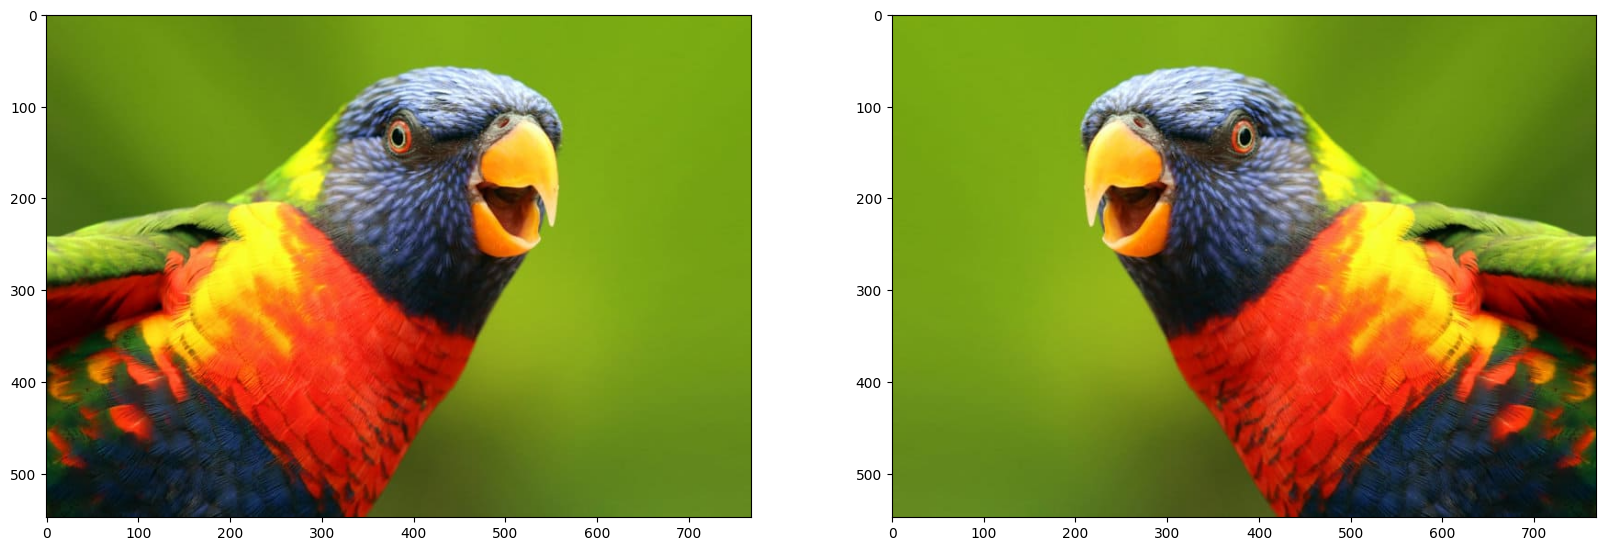

In [10]:
image = io.imread('../images/bird.jpg')
flipped_image = np.fliplr(image)
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
ax[0].imshow(bird)
ax[1].imshow(flipped_image)

SciPy provides more advanced image processing functionality, such as filters, morphological operations, and interpolation techniques.

Example - Blurring an image with SciPy:

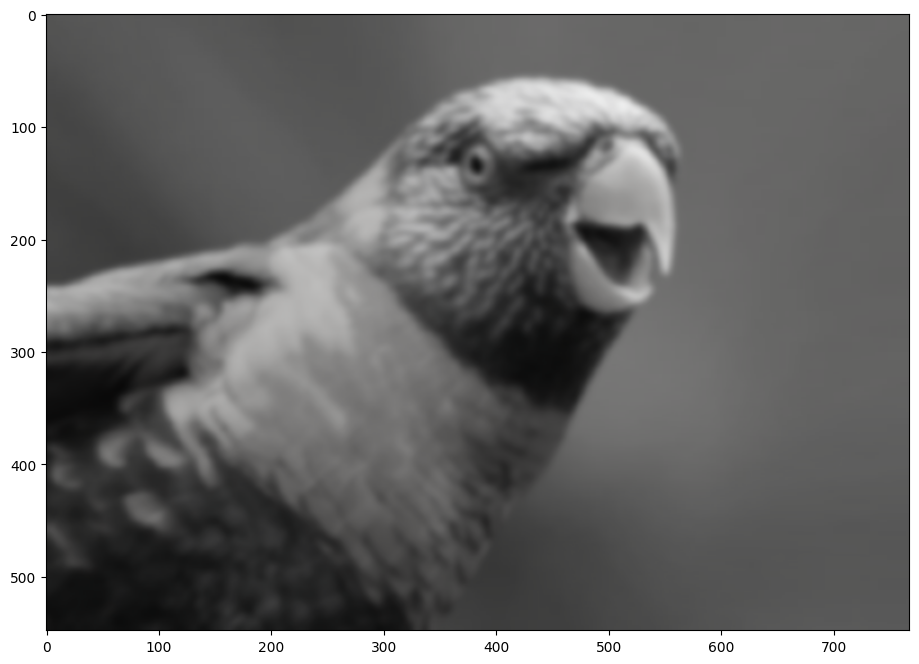

In [84]:
blurred_image = ndimage.gaussian_filter(image, sigma=3)
plt.figure(figsize=(20,8))
plt.imshow(blurred_image)

### Scikit-Image:

Scikit-Image is a Python library built on top of SciPy, specialized in image processing tasks. It provides a wide range of algorithms to help users perform various image manipulations, such as filtering, transformations, and object detection.

Example - Edge detection with Scikit-Image:

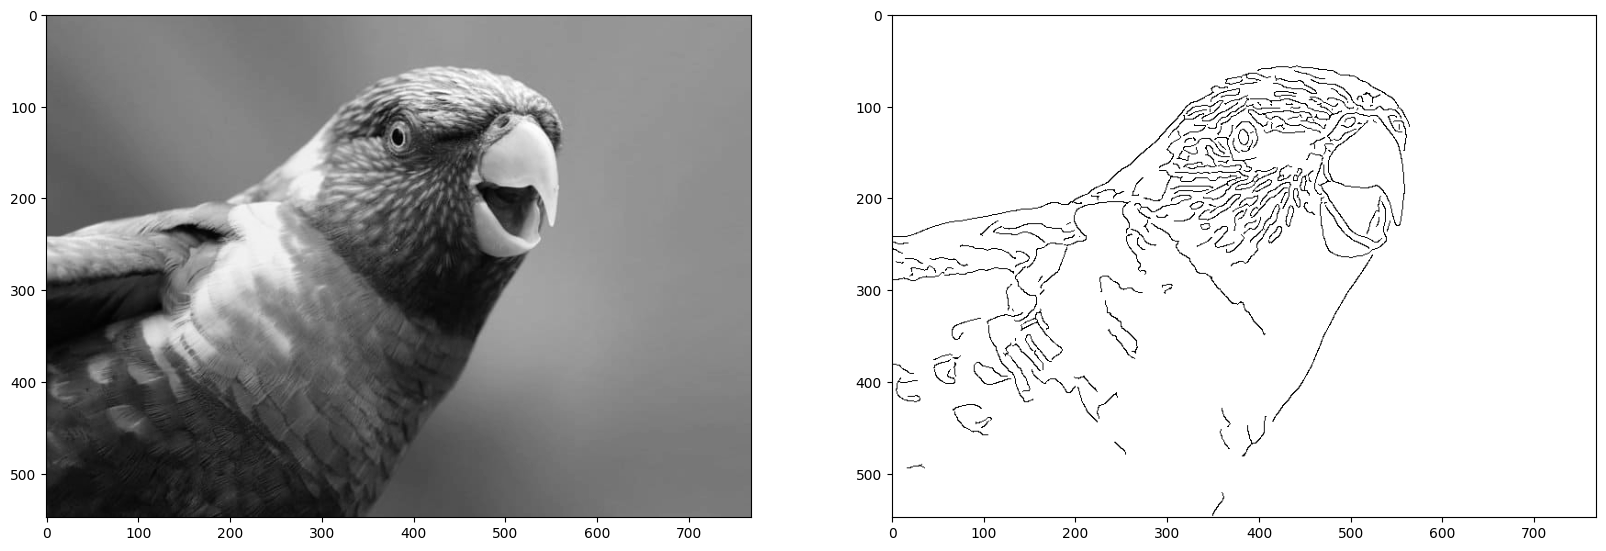

In [109]:
image = io.imread('../shared/images/bird.jpg', as_gray=True)
edges = feature.canny(image, sigma=2)
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
ax[0].imshow(image,cmap='gray')
ax[1].imshow((edges * 255).astype(np.uint8),cmap='gray_r')

### OpenCV-Python:

OpenCV (Open Source Computer Vision Library) is a widely used, open-source computer vision library that includes bindings for Python. OpenCV provides a comprehensive suite of image processing functions, as well as more advanced computer vision and machine learning algorithms.

Example - Resizing an image with OpenCV-Python:

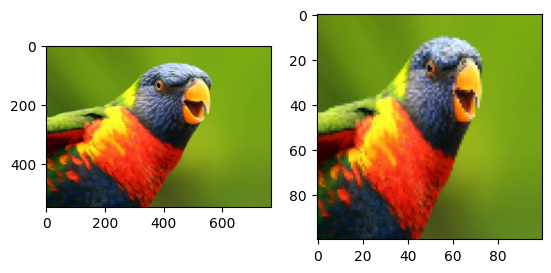

In [93]:
resized_image = cv.resize(bird, (100, 100), interpolation=cv.INTER_LINEAR)

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(bird)
ax[1].imshow(resized_image)

### PIL/Pillow:

The Python Imaging Library (PIL) is a popular image processing library originally developed for Python 1.5. It is no longer actively maintained, but a modern fork, Pillow, is widely used due to its simplicity and compatibility with PIL. With PIL/Pillow, users can perform basic image processing tasks such as opening, resizing, rotating, and applying filters.

Example - Converting an image to grayscale with PIL/Pillow:

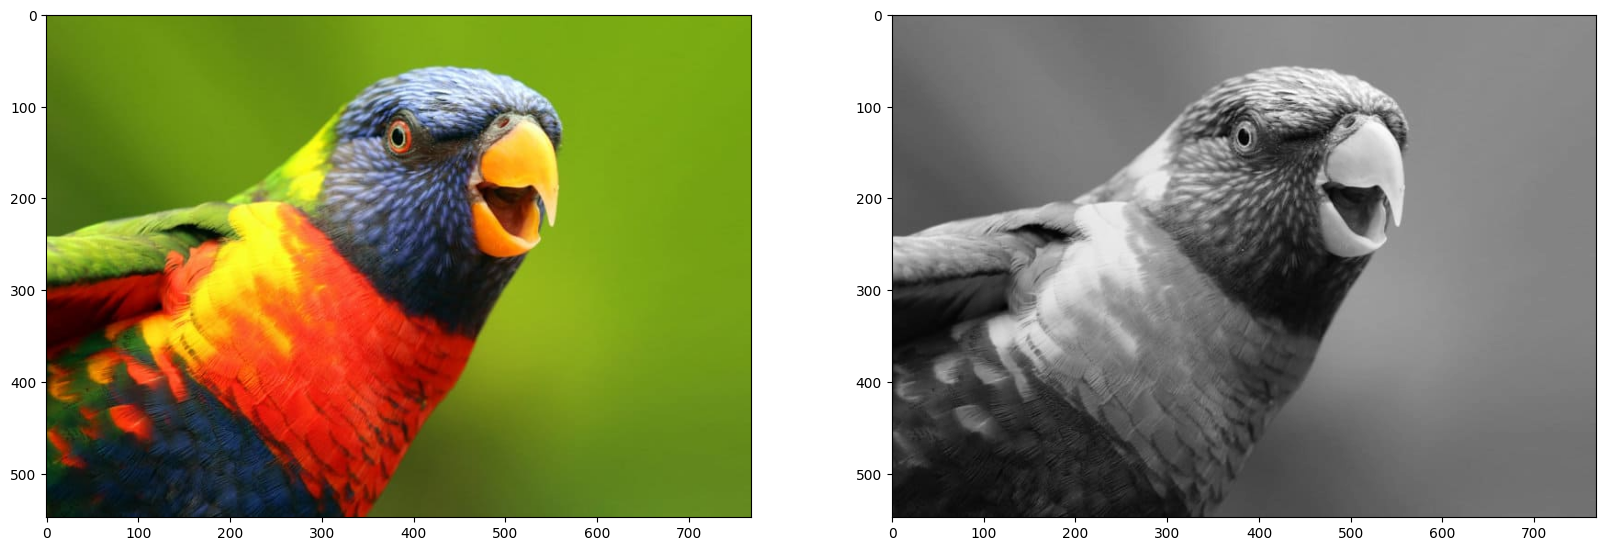

In [11]:
image = Image.open('../images/bird.jpg')
grayscale_image = image.convert('L')

fig, ax = plt.subplots(ncols=2, figsize=(20,8))
ax[0].imshow(image)
ax[1].imshow(grayscale_image,cmap='gray')

In summary, each of these libraries has its strengths in addressing various image processing tasks. While NumPy and SciPy serve as the foundation, providing basic and advanced mathematical operations, Scikit-Image offers more specialized functions built on this foundation. OpenCV excels with its extensive collection of computer vision algorithms and functions, whereas PIL/Pillow is a popular and easy-to-use library for basic image manipulation tasks.

# Here is a taste of what you can do with these libraries

## A Microscope Image

This section is taken from [here](https://scipy-lectures.org/advanced/image_processing/) with some minimal modifications:

We start with a microscope image from [here](https://english.kyodonews.net/news/2021/04/162d86c9ad68-japan-universities-develop-speedier-analysis-of-coronavirus-mutations.html).

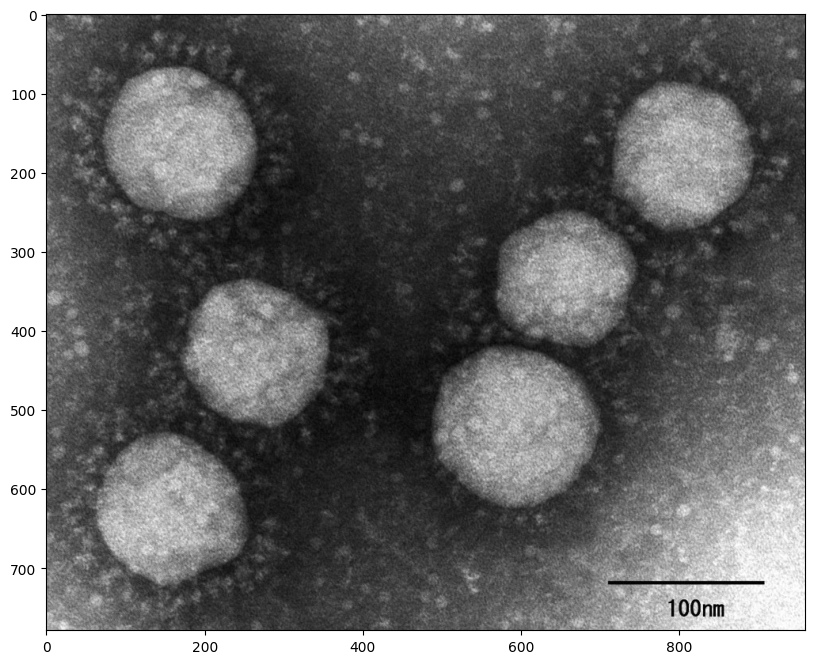

In [12]:
img = plti.imread('../images/blobs.jpg')[:,:,1]/255.0
plt.figure(figsize=(12,8))
plt.imshow(img, cmap='gray')

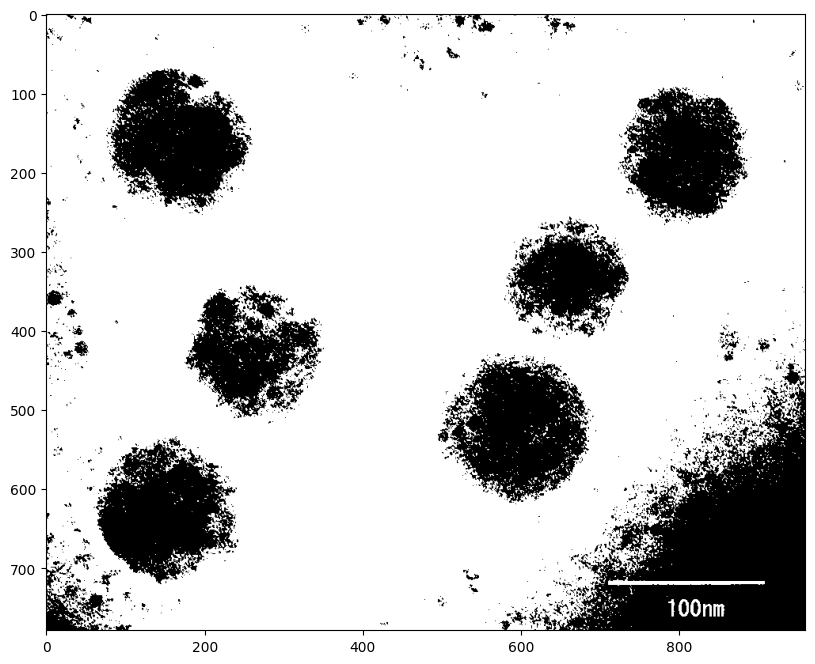

In [49]:
binary_img = np.exp(-img) > 0.6
plt.figure(figsize=(12,8))
plt.imshow(binary_img, cmap='gray')

Now, let us remove the noise:

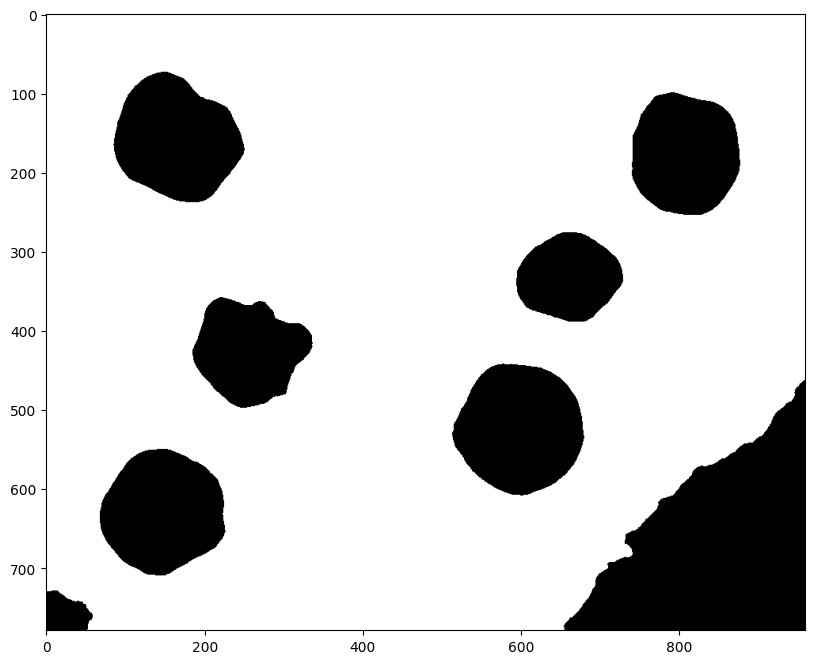

In [59]:
denoised = cv.fastNlMeansDenoising(binary_img.astype(np.uint8),None,4,4,40)
plt.figure(figsize=(12,8))
plt.imshow(denoised, cmap='gray')

Now, let us count the number of connected componets and label them:

1


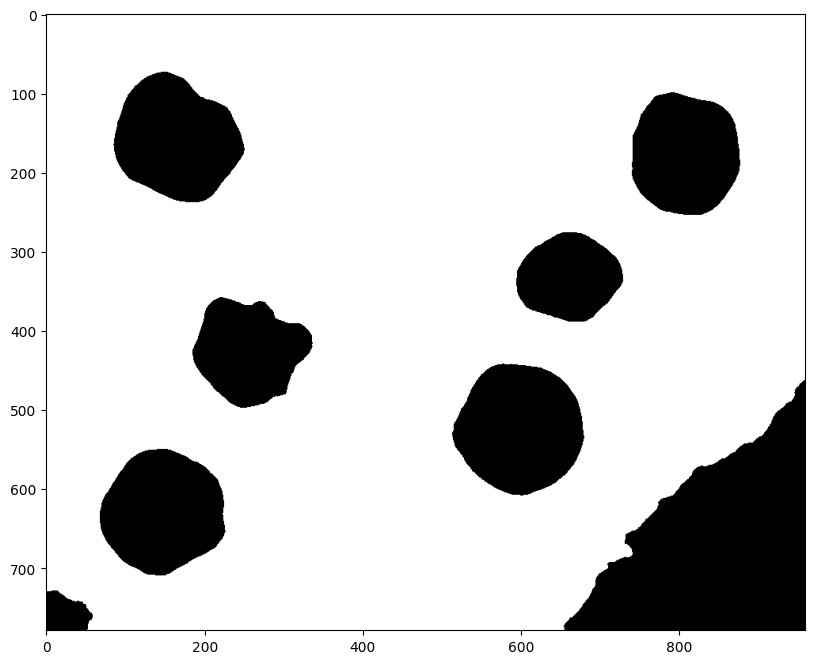

In [60]:
label_im, nb_labels = ndimage.label(denoised)
print(nb_labels)

plt.figure(figsize=(12,8))
plt.imshow(label_im,cmap='gray') 

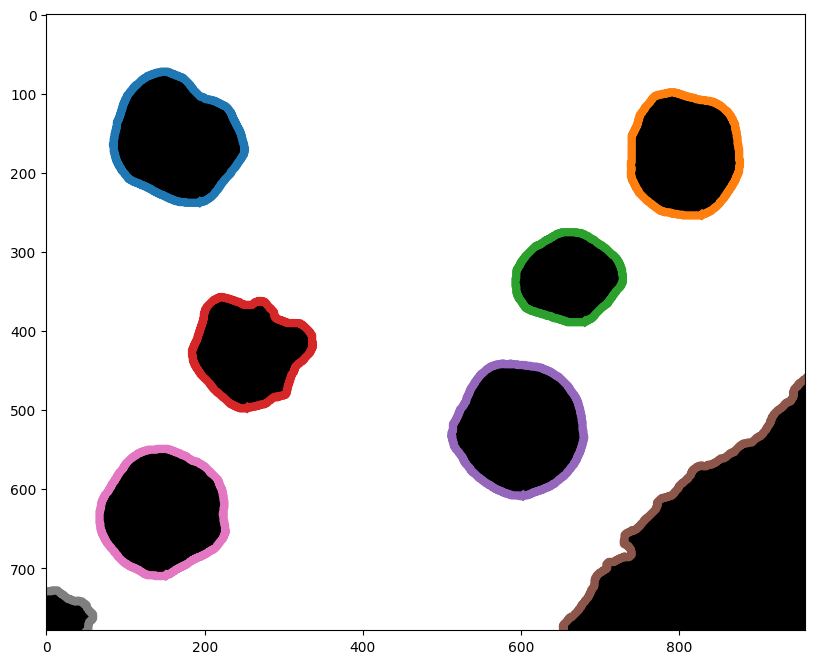

In [61]:
contours = measure.find_contours(denoised, 0.9)

fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(denoised, cmap='gray')

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=6)

## A Hubble Telescope Image

This section is taken from [here](https://scikit-image.org/docs/stable/auto_examples/filters/plot_tophat.html#sphx-glr-auto-examples-filters-plot-tophat-py) with minimal modification.

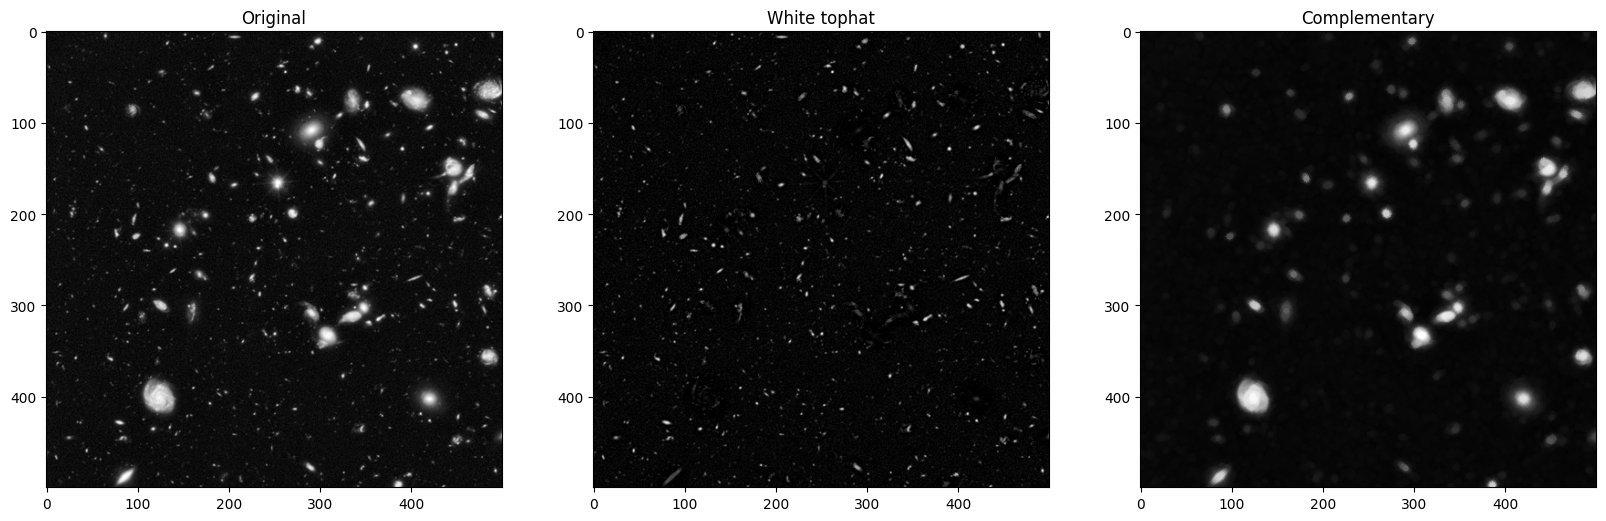

In [62]:
image = color.rgb2gray(data.hubble_deep_field())[:500, :500]

footprint = morphology.disk(3)
res = morphology.white_tophat(image, footprint)

fig, ax = plt.subplots(ncols=3, figsize=(20,8))
ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')
ax[1].set_title('White tophat')
ax[1].imshow(res, cmap='gray')
ax[2].set_title('Complementary')
ax[2].imshow(image - res, cmap='gray')

plt.show()

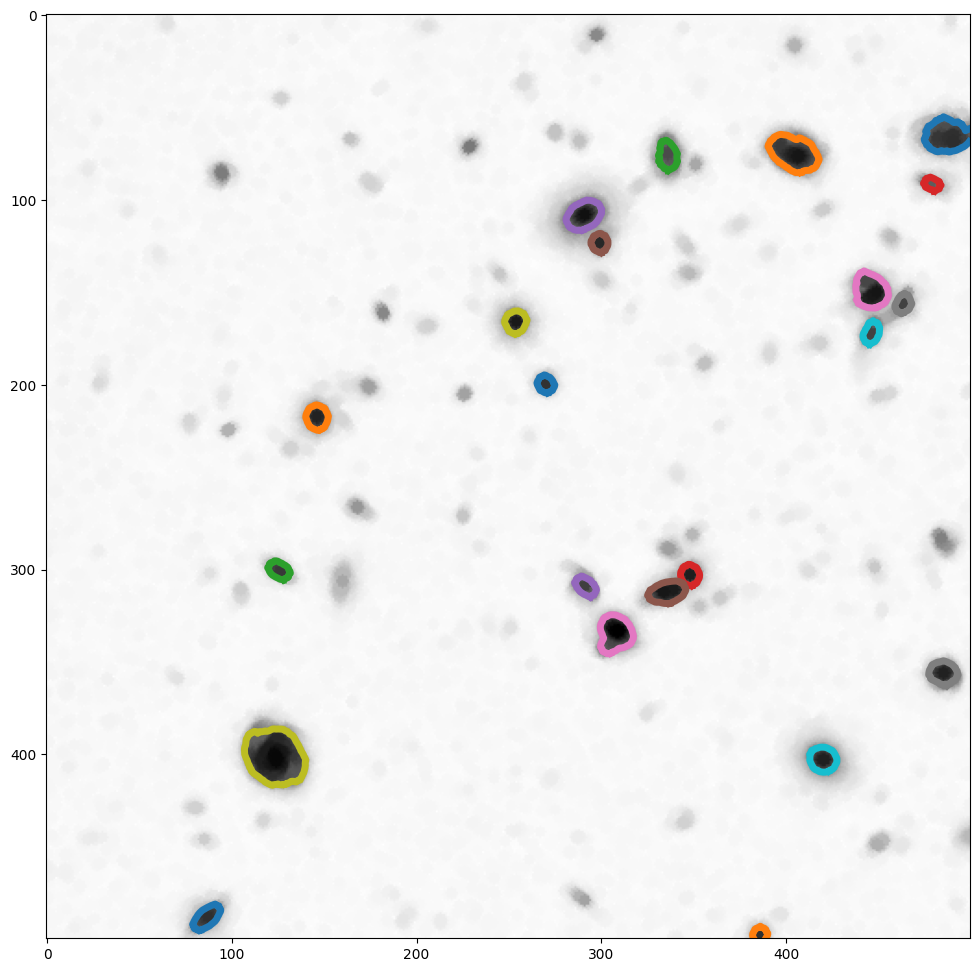

In [68]:
img = image - res
contours = measure.find_contours(img, 0.5)

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(img, cmap='gray_r')
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=5)

## Olivetti Faces

This dataset contains face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge. 

In [13]:
faces = fetch_olivetti_faces(data_home='/home/kaygun/local/data/scikit_learn_data/')

In [14]:
faces.data.shape

(400, 4096)

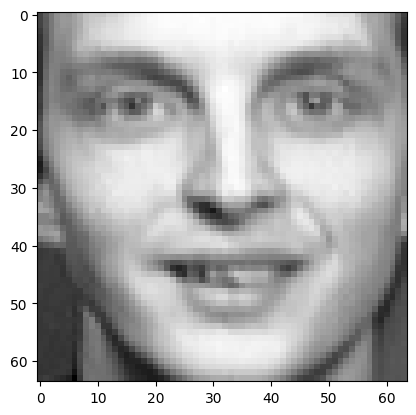

In [62]:
m = np.random.randint(400)
img = faces.data[m,:].reshape((64,64))
plt.imshow(img,cmap='gray')

In [63]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [64]:
def averageFace(m):
    i = 10*m
    data = faces.data[i:i+10,:]
    fig, ax = plt.subplots(ncols=11, figsize=(30,10))
    for j in range(10):
        ax[j].set_title(f'Original {j}')
        ax[j].imshow(data[j,:].reshape((64,64)), cmap='gray')
    ax[10].set_title('Average Face')
    plt.imshow(data.mean(axis=0).reshape((64,64)),cmap='gray')

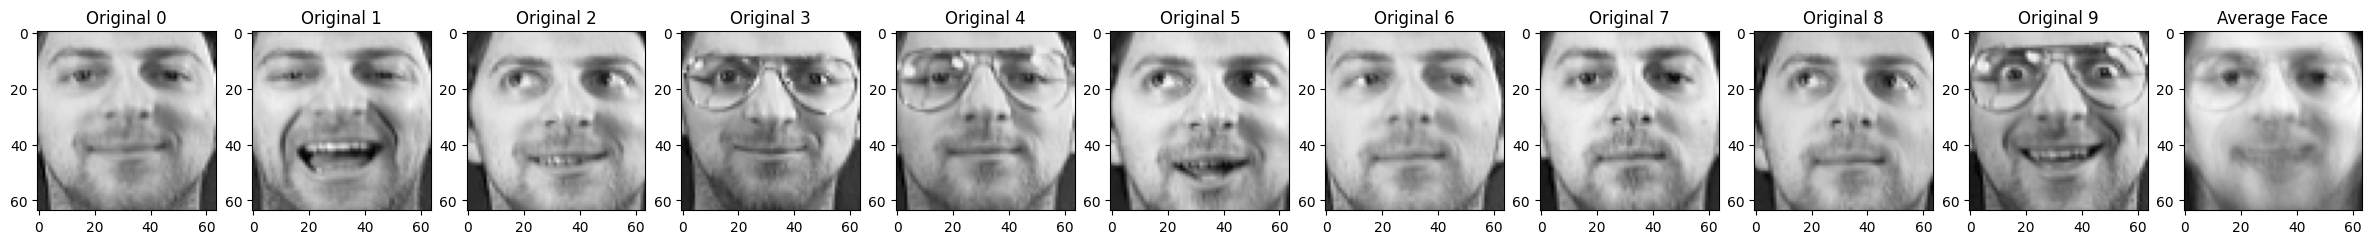

In [66]:
m = np.random.randint(40)
averageFace(6)

In [67]:
def eigenFace(m):
    i = 10*m
    data = faces.data[i:i+10,:].transpose()
    model = PCA(n_components=2)
    res = model.fit_transform(data)
    fig, ax = plt.subplots(ncols=11, figsize=(30,6))
    for j in range(10):
        ax[j].set_title(f'Original {j}')
        ax[j].imshow(data[:,j].reshape((64,64)), cmap='gray')
    ax[10].set_title('Eigen Face')
    plt.imshow(res[:,0].reshape((64,64)),cmap='gray_r')

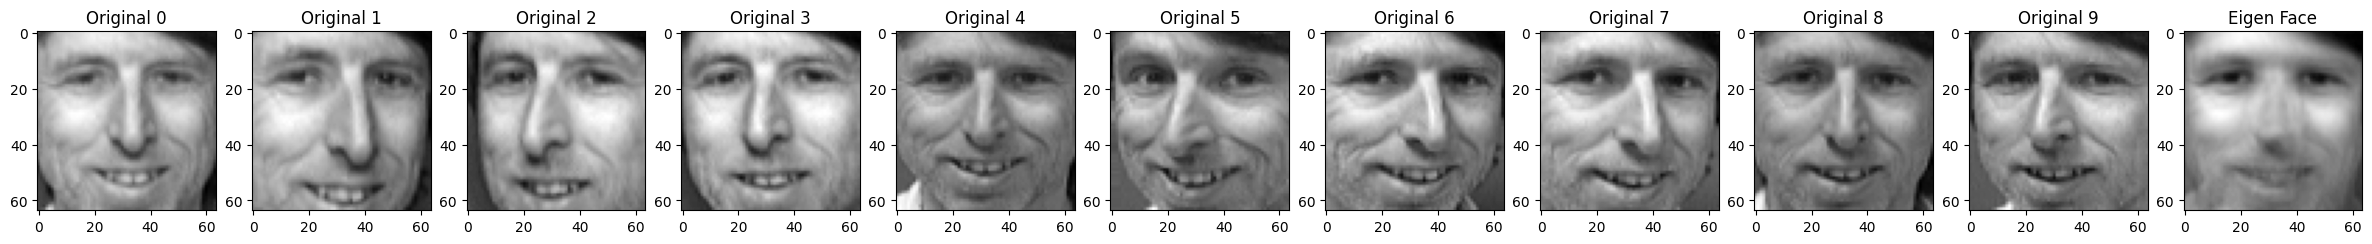

In [68]:
m = np.random.randint(40)
eigenFace(m)

In [69]:
y = faces.target
X = faces.data

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75)

In [70]:
model = LogisticRegression(C=10,penalty='l2',solver='saga',max_iter=1500,multi_class='ovr')
model.fit(X_train,y_train)

/home/kaygun/local/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kaygun/local/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kaygun/local/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kaygun/local/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kaygun/local/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kaygun/local/venv/lib/python3.11/site-packages/sklearn

LogisticRegression(C=10, max_iter=1500, multi_class='ovr', solver='saga')

In [79]:
predicted = model.predict(X_test)
predicted

array([18, 35, 31, 25, 15, 20, 35,  8, 33, 27, 28, 21, 12, 29, 17, 12, 33,
       37, 39, 24, 27, 33, 21, 31, 17,  7, 29,  7, 10, 23,  0, 34, 38, 28,
        2, 16, 39, 16, 29, 19, 33, 36,  6, 36,  3, 27, 11, 29,  5,  5, 25,
       11, 28, 38, 36,  2, 23, 34, 22, 11, 11, 10, 19, 37, 28,  1, 24,  3,
        3,  4,  6, 22, 22, 32, 17,  8,  7, 29, 10, 16,  6, 30, 37, 18, 24,
       15, 10, 19,  8, 28, 20, 27, 30, 32, 27, 37, 26, 23,  8, 16])

In [80]:
confusion_matrix(y_test,predicted)[:10,:10]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4]])

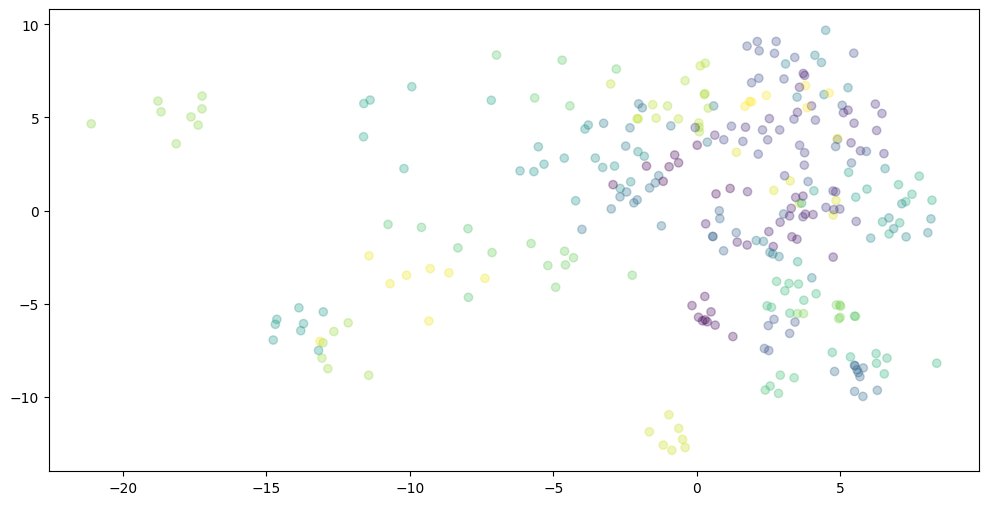

In [82]:
lda = LDA(n_components=2)
z = lda.fit_transform(X_train,y_train)
plt.figure(figsize=(12,6))
plt.scatter(z[:,0],z[:,1],c=y_train,alpha=0.3)

## Fashion MNIST Dataset

Data can be found [here](https://github.com/zalandoresearch/fashion-mnist)

2023-11-06 15:55:35.036239: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 15:55:35.036280: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 15:55:35.038221: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-06 15:55:35.218239: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 15:55:36.699646: W tensorflow/compiler/

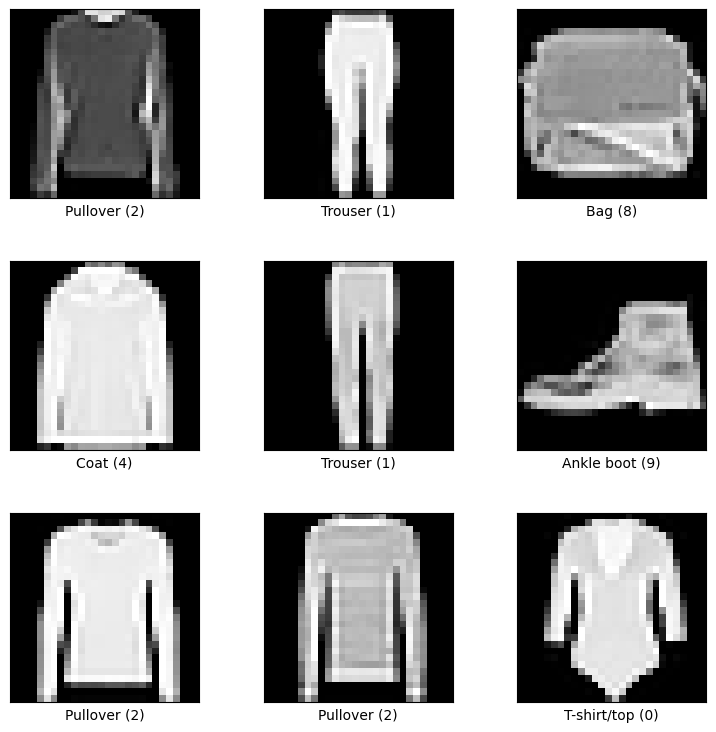

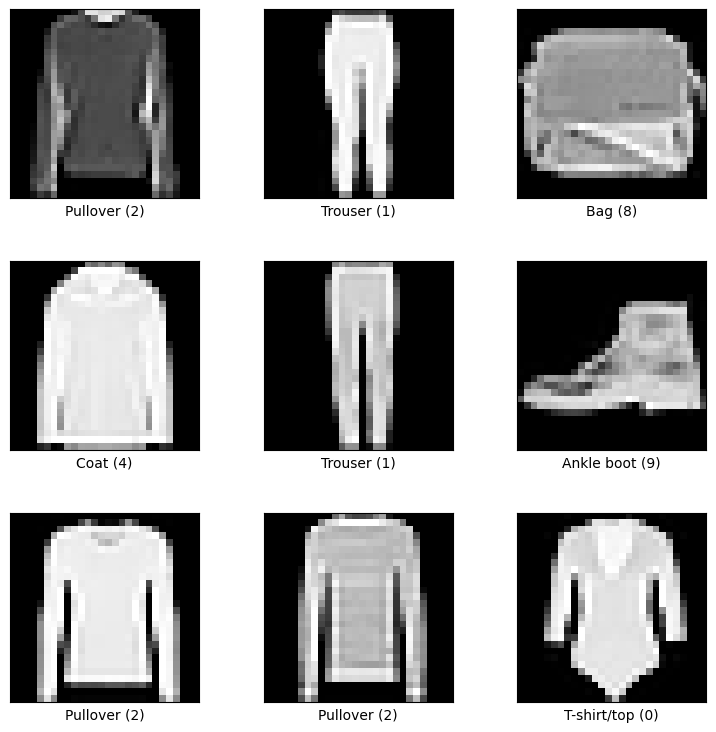

In [71]:
import tensorflow_datasets as tfds

fmnist_data,fmnist_info = tfds.load("fashion_mnist", split="train",
                                     with_info=True,
                                     data_dir='/home/kaygun/local/data/tensorflow_datasets/')

tfds.show_examples(fmnist_data,fmnist_info)

In [72]:
def tfGetData(df,N):
    X_train = []
    y_train = []
    for u in df.take(N):
        X_train.append(u['image'].numpy().reshape((28*28)))
        y_train.append(u['label'].numpy())
    return X_train,y_train

In [73]:
X_train,y_train = tfGetData(fmnist_data,2000)
X_test,y_test = tfGetData(fmnist_data,100)

2023-11-06 15:55:42.834681: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2023-11-06 15:55:42.883847: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [74]:
model = LogisticRegression(C=2,tol=0.01,max_iter=1400)
model.fit(X_train,y_train)

LogisticRegression(C=2, max_iter=1400, tol=0.01)

In [75]:
predicted = model.predict(X_test)
confusion_matrix(y_test,predicted)

array([[12,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 13,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  9]])

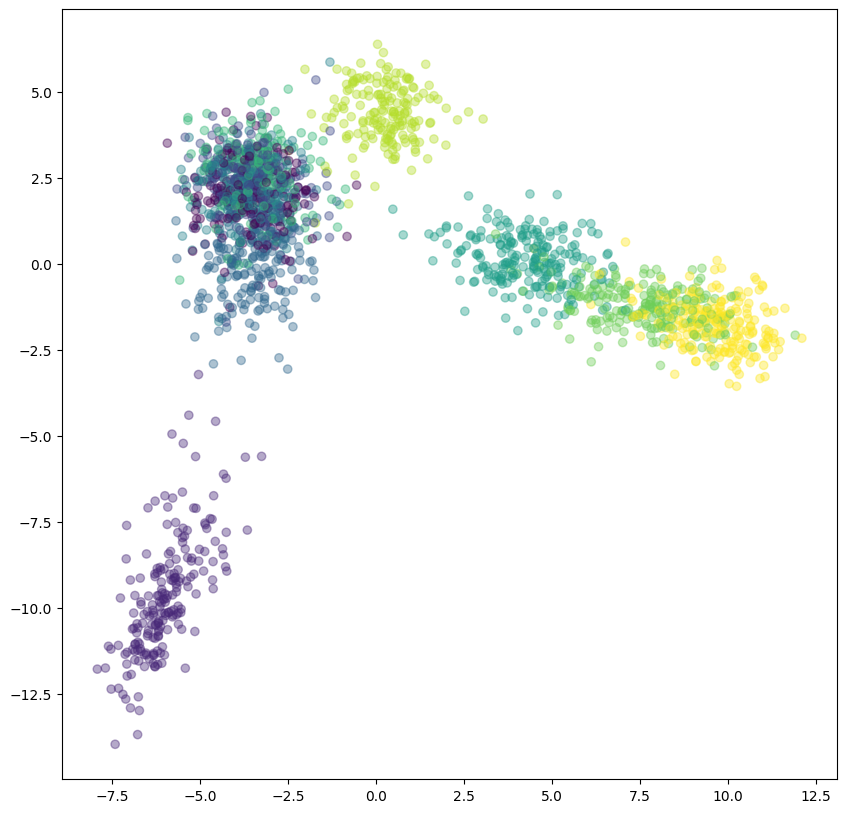

In [100]:
model = LDA(n_components=2)
z = model.fit_transform(X_train,y_train)
plt.figure(figsize=(10,10))
plt.scatter(z[:,0],z[:,1],c=y_train,alpha=0.4)

## Some Other TensorFlow Datasets You Can Use

In [235]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2003',
 'controlled_noisy_web_labels',
 'coqa',
 'cos_e',
 'cos

# Hyper-spectral Images

As we saw above, normal images have 3 channels: red, blue and green. [Hyper-spectral images](https://en.wikipedia.org/wiki/Hyperspectral_imaging) on the other hand, have many more channels each corresponding to a specfic band of electromagnetic spectrum. Most sattelite images are hyper-spectral. Here some hyper-spectral image sources:

## Some hyper-spectral image datasets

### Sattelite Images

1. [USGS Earth-Explorer](https://gisgeography.com/usgs-earth-explorer-download-free-landsat-imagery/)
1. [Next Generation Weather Radar Images Datasets](https://www.ncei.noaa.gov/products/radar/next-generation-weather-radar)
2. [Open Library for Earth Observations Machine Learning](https://mlhub.earth/)
3. [Grupo de Inteligencia Computacional de la Universidad del País Vasco (UPV/EHU)](https://www.ehu.eus/ccwintco/index.php?title=P%C3%A1gina_principal)
4. [A collection of hyperspectral images from Weebly](http://lesun.weebly.com/hyperspectral-data-set.html)
5. [Global Hyperspectral Imaging Spectral-library of Agricultural crops for Conterminous United States](https://catalog.data.gov/dataset/global-hyperspectral-imaging-spectral-library-of-agricultural-crops-for-conterminous-unite)

### Others

7. [Hyperspectral images of fruits](https://sites.google.com/site/hyperspectralcolorimaging/dataset/fruits)
6. [TokyoTech 31-band Hyperspectral Image Dataset](http://www.ok.sc.e.titech.ac.jp/res/MSI/MSIdata31.html)
7. [Real-World Hyperspectral Images Database](http://vision.seas.harvard.edu/hyperspec/d2x5g3/)
8. [Hyperspectral image dataset for salt stress phenotyping of wheat](https://conservancy.umn.edu/handle/11299/195720)


For example the image below [(Source)](https://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes) has 200 channels.

In [76]:
pine = loadmat('../data/Indian_pines_corrected.mat')
labels = loadmat('../data/Indian_pines_gt.mat')

pine['indian_pines_corrected'].shape

(145, 145, 200)

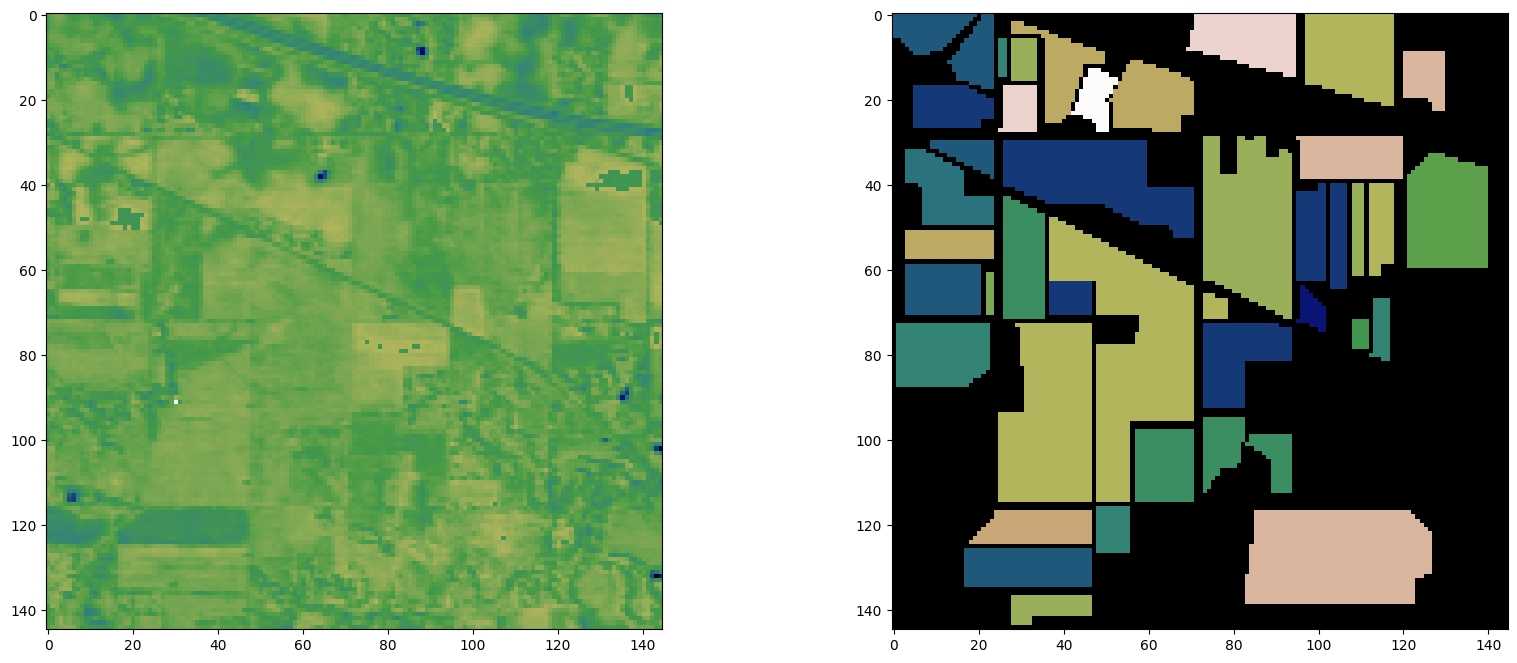

In [77]:
m = np.random.randint(200)

fig, ax = plt.subplots(ncols=2, figsize=(20,8))
ax[0].imshow(pine['indian_pines_corrected'][:,:,m], cmap='gist_earth')
ax[1].imshow(labels['indian_pines_gt'], cmap='gist_earth')

In [103]:
X = pine['indian_pines_corrected'].reshape(145*145,200)
X.shape

(21025, 200)

In [104]:
y = labels['indian_pines_gt'].reshape(145*145)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.66)

model = LogisticRegression(max_iter=800,multi_class='ovr')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/home/kaygun/local/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
confusion_matrix(y_test,y_pred)[:10,:10]

array([[3190,    2,   56,   23,    4,    9,   37,    2,   11,    2],
       [   2,   15,    0,    0,    0,    0,    0,    0,    1,    0],
       [  44,    0,  372,    1,    1,    0,    0,    0,    0,    0],
       [  44,    0,   22,  125,    6,    0,    1,    0,    0,    0],
       [  24,    0,   13,   18,   35,    0,    0,    0,    0,    0],
       [  64,    0,    0,    0,    0,   88,    0,    0,    0,    0],
       [  52,    0,    0,    0,    0,    0,  177,    0,    0,    0],
       [   5,    0,    0,    0,    0,    0,    0,    7,    0,    0],
       [  10,    0,    0,    0,    0,    0,    1,    0,  158,    0],
       [   2,    0,    0,    0,    0,    0,    0,    0,    0,    2]])

In [107]:
confusion_matrix(y_test,y_pred)[10:,10:]

array([[188,  71,   0,   0,   0,   0,   0],
       [ 16, 666,  22,   0,   0,   0,   0],
       [  0,  12, 137,   0,   0,   0,   0],
       [  0,   0,   0,  62,   0,   0,   0],
       [  0,   0,   0,   0, 169,   7,   0],
       [  0,   0,   0,   0,   6,  13,   0],
       [  1,   0,   5,   0,   0,   0,  21]])